# [IAPR][iapr]: Project


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 29.04.2022


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

An anonymous card player that we will name Bartick Pruel is willing to improve his poker skills. To do so, he asked our lab to design a tool that will automatically detect the hands of the players around the table. 

---

## 1. Data

To achieve your task, you will be given images that look like this (without the overlay)


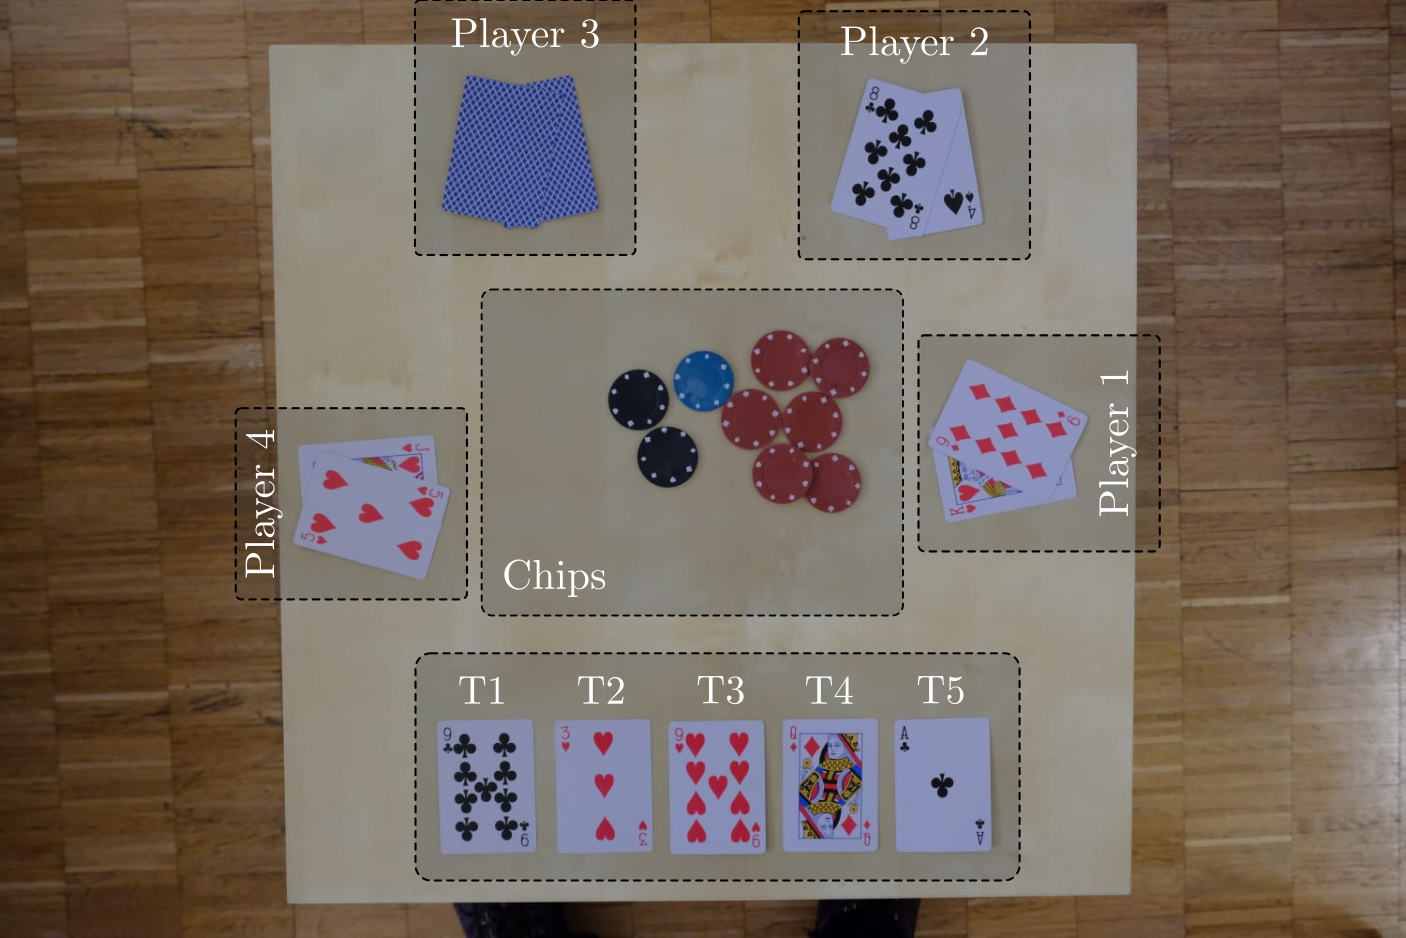

### 1.1. Table layout

The table is divided into 3 main parts:
* **Table cards (T1-T5)**: These cards are shared by every player. They are defined as the flop (T1-T3), the turn (T4) and the river (T5). The table cards are *always* visible.
* **Player cards (P11-P42)**: The cards played by each player (4 pairs). Each player *always* has 2 cards in hand. When a player is not playing, you can see the back of the cards (ex: player 3 here).
* **Chips**: The chips at the center of the table are named the pot.

### 1.2. Cards & Chips

The cards deck are composed of 52 cards split into 4 different colors: (D)imanond, (H)eart, (S)pade, (C)lub. Each color is composed of 13 different cards: 2, 3, 4, 5, 6, 7, 8, 9, 10, (J)ack, (Q)ueen, (K)ing and (A)ce.

Th chips can be of 5 different colors: (r)ed, (g)reen, (b)lue, blac(k) or (w)hite.


### 1.3 Structure

You can download the data for the project here: [download data](https://drive.google.com/file/d/1d7rOe88kEK1CEaLvYgNZkxrtKImLVC9X/view)

```
data 
│
└─── image_setup
│    │    back_cards.jpg      # Back of the cards (either blue or red)
│    │    chips.jpg           # Set of chips used (red, green, blue, black, white)
│    │    kings.jpg           # Kings from the 4 colors (diamond, heart, spade, club)
│    │    spades_suits.jpg    # All cards of spades (2 - 10, Jack, Queen, King, Ace)
│    │    table.jpg           # Empty table
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.jpg        # Train image 00
│    │    ...
│    │    train_27.jpg        # Train image 27
│    └─── train_labels.csv    # Ground truth of the train set
│
└─── test
     │    test_00.jpg         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx             # Test image xx (day of the exam only)
```


---

## 2. Tasks


Your task is to predict the following parameters for a set of images.

* **T1** (str): String code of the first card of the flop (far left) 
* **T2** (str): String code of the second card of the flop
* **T3** (str): String code of the third card of the flop
* **T4** (str): String code of the turn
* **T5** (str): String code of the river


* **P11** (str or int): String code of player 1 card 1. Should be 0 if player 1 is not Playing.
* **P12** (str or int): String code of player 1 card 2. Should be 0 if player 1 is not Playing.
* **P21** (str or int): String code of player 2 card 1. Should be 0 if player 2 is not Playing.
* **P22** (str or int): String code of player 2 card 2. Should be 0 if player 2 is not Playing.
* **P31** (str or int): String code of player 3 card 1. Should be 0 if player 3 is not Playing.
* **P32** (str or int): String code of player 3 card 2. Should be 0 if player 3 is not Playing.
* **P41** (str or int): String code of player 4 card 1. Should be 0 if player 4 is not Playing.
* **P42** (str or int): String code of player 4 card 2. Should be 0 if player 5 is not Playing.


* **CR** (int): Number of (r)ed chips in the pot
* **CG** (int): Number of (g)reen chips in the pot
* **CB** (int): Number of (b)lue chips in the pot
* **CK** (int): Number of blac(k) chips in the pot
* **CW** (int): Number of (w)hite chips in the pot


The output is saved using the function **save_results** as presented below.

---





## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** with few images, but **no ground truth** (csv file).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_game** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---

## 4. Your code


### Image cutting / Area Labelling

#### Introduction

1. 图片切割坐标原点和参考系

  若采取原图坐标系和参考系，即左上角像素（0,0）处为坐标原点，图片长度和宽度为坐标系，**纸牌相对桌子的位置基本固定**，但由于桌子位置相对坐标原点的差异导致切割结果出现重大不确定性。**因此**使用桌子左上角顶点为坐标原点，桌子的长度为坐标系，此处认为桌子为标准的正方形。
 

2. 从原图中提取桌子区域

  坐标系：对图片进行预处理，包括erosion和灰度化，然后使用opencv进行轮廓检测。由于某些图像具有过曝等问题，因此个别检测结果不很理想。之后采用四边形拟合方法，获得桌子左上角顶点坐标。经过考察，所有正方形的左上角顶点均可完美拟合桌子顶点。

  参考系：由于拍摄时的角度差异带来的细微影响，桌子的长度有所不同，因此理论上需要建立不同的参考系，以确定具体的切割区域大小，但这部分任务较为复杂，考虑切割准确性并不精密，因此暂时默认所有图片中桌子长度所占像素个数均相等。

3. Summary

  **纸牌和chips相对桌子固定，但桌子位置相对于图片坐标原点不固定，因此需要首先在图片中提取桌面区域。**


**Useful notes**

1. OpenCV read image in BGR channel, as a narray

  ```
  img = cv2.imread(test_data_dir)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ```


2. PIL read image as an object: PIL.JpegImagePlugin.JpegImageFile which can be tranfomed into narray using np.array(object)



In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os,sys
sys.path.append('/content/drive/MyDrive/iapr/project/')
import cv2 as cv
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import pandas as pd

from termcolor import colored

# To avoid troubles with the treys library, comment the following lines
# from treys import Card
# import utils 
# from utils import eval_listof_games , debug_listof_games, save_results , load_results

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Global variables and functions

data_path = "/content/drive/MyDrive/iapr/project/data/train"
train_size = np.loadtxt(os.path.join(data_path, "train_size.txt")).astype(int)
file = os.path.join(data_path, f"train_{str(26).zfill(2)}.jpg")
im_origin = PIL.Image.open(file)


import warnings
warnings.filterwarnings("ignore")

# Global functions
def plotMultipleImages(nrows, ncols, images, titles, cmap, figwidth=8, figheight=9):
    fig = plt.figure(figsize=(figwidth,figheight))
    plt.axis('off')
    plt.title('Fig title')
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    for i in range(len(titles)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        # ax.axis('off')
        ax.set_title(titles[i])
        ax.set_xlabel(titles[i])
        if cmap[i]=='rgb':
            ax.imshow(images[i])
        else:
            ax.imshow(images[i], cmap=cmap[i])
    plt.show()

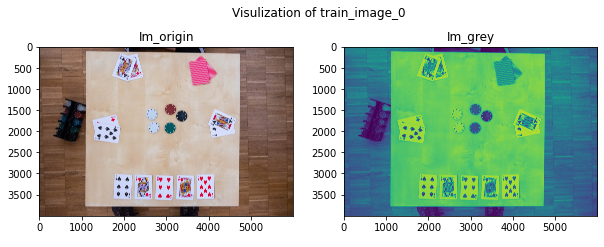

In [5]:
# Visualization

fig = plt.figure(figsize=(10,4))
plt.title('Visulization of train_image_0')
plt.axis('off')
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Im_origin')
plt.imshow(im_origin)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Im_grey')
imgGrey = im_origin.convert('L')
plt.imshow(imgGrey)
plt.show()

#### 1 Extracting the desktop and creating a uniform coordinate system

In [6]:
# Pre-processing 
def preprocessing(im_origin = ''):
  h, w, ch = np.array(im_origin).shape
  obj_img = np.ones((h, w, ch), dtype=np.uint8)
  obj_img_255 = obj_img*255

  img_inverse = obj_img_255-np.array(im_origin)
  Gaussian_im = cv.GaussianBlur(np.array(img_inverse), (5,5), 0)
  img_bgr = cv.cvtColor(Gaussian_im, cv.COLOR_RGB2BGR)
  im_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)
  ret, binary = cv.threshold(im_gray, 100, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
  kernel = cv.getStructuringElement(cv.MORPH_ERODE, (6,6))
  im_morph = cv.morphologyEx(binary, cv.MORPH_ERODE, kernel, iterations=10)
  return obj_img, im_morph 

# Extraction of the maximum contour, i.e. the Table
def tableCutting(obj_img, im_morph): 
  
  # Detection of maximum contours
  contours, hierarchy = cv.findContours(im_morph, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  area = []
  for k in range(len(contours)):
    area.append(cv.contourArea(contours[k]))
  max_idx = np.argmax(np.array(area))

  # Visualization
  # cv.drawContours(obj_img, contours, max_idx, [255,255,255], cv.FILLED)
  # plt.figure(figsize=(12,12))
  # plt.subplot(1,2,1)
  # plt.imshow(obj_img)
  # plt.title('Longest Contour')

  # External polygon fitting, table top left coordinate extraction
  rect = cv.minAreaRect(contours[max_idx]) # Get the (centre(x,y), (width,height), rotation angle) of the smallest outer rectangle
  box = cv.boxPoints(rect) # Get the coordinates of the 4 vertices of the smallest outer rectangle(ref: cv2.boxPoints(rect) for OpenCV 3.x)
  box = np.int0(box)
  o_index = np.argmin(np.sum(box, axis=1), axis=0)

  # Visularization
  # cv.circle(obj_img, tuple(box[o_index]), 8, (0, 255, 255), 150)
  # cv.drawContours(obj_img, [box], 0, (255, 0, 0), 20)
  # plt.subplot(122)
  # plt.imshow(obj_img)
  # plt.title('minAreaRect')
  # plt.show()
  return box[o_index]

#### 2 Extraction of different label areas in the table

In [7]:
# Crop, currently only T label.
def crop(o, im_origin):
  train_size = np.loadtxt(os.path.join(data_path, "train_size.txt")).astype(int)
  # w1,h1,w2,h2，
  box_p1 = (o[0]+2600, o[1]+1000, o[0]+3760, o[1]+2400)
  box_p2 = (o[0]+1750, o[1]-50, o[0]+3216, o[1]+880)
  box_p3 = (o[0]+216, o[1]-50, o[0]+1700, o[1]+880)
  box_p4 = (o[0]-50, o[1]+1200, o[0]+1000, o[1]+2265)
  box_T = (o[0], o[1]+2601, o[0]+3765, o[1]+3765)
  box_C = (o[0]+660, o[1]+865, o[0]+2600, o[1]+2465)
  boxes = [box_p1, box_p2, box_p3, box_p4, box_T, box_C]
  ims = []
  for box in boxes:
    im = im_origin.crop(box)
    ims.append(im)
  # train_ims_crop = []
  # train_ims_crop.append(ims)
  # im_names = ['P1', 'p2', 'p3', 'p4', 'T1-T5', 'CR-CW']
  # plotMultipleImages(1, 6, ims, im_names, cmap=['rgb']*6, figwidth=15, figheight=4)
  return ims

In [8]:
im_origin = PIL.Image.open('/content/drive/MyDrive/iapr/project/data/train/train_01.jpg')
obj_img, im_morph = preprocessing(im_origin)
o = tableCutting(obj_img, im_morph)
ims = crop(o, im_origin)

#### 3 Cutting of all images


In [9]:
all_cropped = []
for i in range(train_size):
  print('Image number: {}'.format(i))
  file = os.path.join(data_path, f"train_{str(i).zfill(2)}.jpg")
  im_origin = PIL.Image.open(file)
  obj_img, im_morph = preprocessing(im_origin)
  o = tableCutting(obj_img, im_morph)
  ims = crop(o, im_origin)
  all_cropped.append(ims)

Image number: 0
Image number: 1
Image number: 2
Image number: 3
Image number: 4
Image number: 5
Image number: 6
Image number: 7
Image number: 8
Image number: 9
Image number: 10
Image number: 11
Image number: 12
Image number: 13
Image number: 14
Image number: 15
Image number: 16
Image number: 17
Image number: 18
Image number: 19
Image number: 20
Image number: 21
Image number: 22
Image number: 23
Image number: 24
Image number: 25
Image number: 26
Image number: 27


### XXX

#### 1 检测Players not playing

In [10]:
def find_players(h_imgs, s_imgs, verbose=True):
  """
  Given a list of images of cards, find those players who are not playing
  """
  # Find red cards
  flattened = [img.ravel() for img in h_imgs]
  intensity = np.array([im[im > 0.8].sum() / np.prod(im.shape[:2]) for im in flattened])
  red_non_players = np.argwhere(intensity < 0.2).ravel()
  if verbose:
      print('Red intensity:', intensity)
      print('Red nonplayers:', red_non_players)

  # Find blue cards
  flattened = [img.ravel() for img in s_imgs]
  intensity = np.array([(im > 0.8).sum() / np.prod(im.shape[:2]) for im in flattened])
  blue_non_players = np.argwhere(intensity < 0.04).ravel()
  if verbose:
      print('Blue intensity:', intensity)
      print('Blue nonplayers:', blue_non_players)

  return np.sort(np.intersect1d(red_non_players, blue_non_players))

In [11]:
im_hsv = []
for i,im in enumerate(ims):
  ims[i] = np.array(im)
  im_hsv.append(cv.cvtColor(np.array(im), cv.COLOR_BGR2HSV))

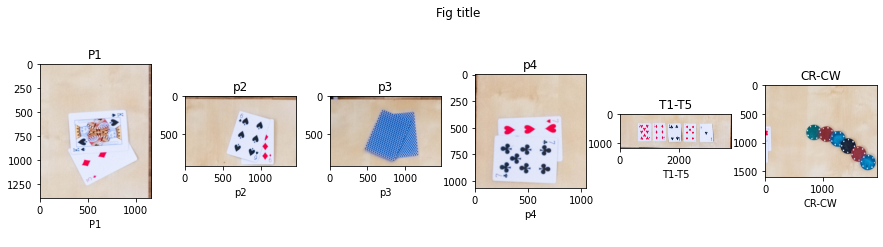

Red intensity: [0. 0. 0. 0.]
Red nonplayers: [0 1 2 3]
Blue intensity: [0.00452278 0.00657337 0.08637437 0.01321887]
Blue nonplayers: [0 1 3]


array([0, 1, 3])

In [27]:
im_origin = PIL.Image.open('/content/drive/MyDrive/iapr/project/data/train/train_05.jpg')
obj_img, im_morph = preprocessing(im_origin)
o = tableCutting(obj_img, im_morph)
ims = crop(o, im_origin)

h_imgs = [im[:, :, 0]/255 for im in im_hsv[:4]] # 前四个分割区域,即p1-p4的H通道数据
s_imgs = [im[:, :, 1]/255 for im in im_hsv[:4]] # p1-p4的s通道数据

r_imgs = [im[:, :, 0]/255 for im in ims[:4]]
b_imgs = [im[:, :, 2]/255 for im in ims[:4]]
players = find_players(h_imgs, s_imgs)
players

In [25]:
# ims[0].shape
ims[0][:, :, 0].shape
# h_imgs[0].shape

(1400, 1160)

Red intensity: [0.79425992 0.7291269  0.43636276 0.77350894]
Red nonplayers: []
Blue intensity: [0.39814655 0.27288063 0.13472234 0.29700961]
Blue nonplayers: []


array([], dtype=int64)

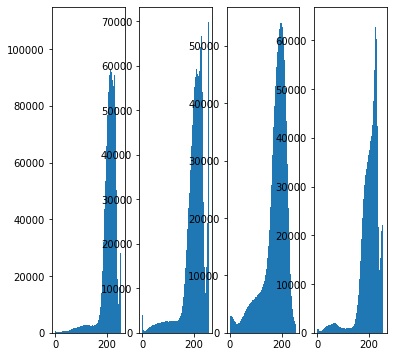

In [13]:
# img=cv.imread('/content/drive/MyDrive/iapr/project/data/train/train_00.jpg')
# img = np.array(img)
# img = ims[1]
fig = plt.figure(figsize=(6,6))
plt.subplot(141)
# histr = cv.calcHist([ims[0]],[0],None,[256],[0,256])
# plt.plot(histr,color = 'red')
plt.hist(ims[0].ravel(), 256, [0, 256]) 

# histr = cv.calcHist([ims[1]],[1],None,[256],[0,256])
# plt.plot(histr,color = 'red')
plt.subplot(142)
plt.hist(ims[1].ravel(), 256, [0, 256]) 


# histr = cv.calcHist([img[2]],[2],None,[256],[0,256])
# plt.plot(histr,color = 'red')
plt.subplot(143)
plt.hist(ims[2].ravel(), 256, [0, 256]) 


# histr = cv.calcHist([im[3]],[3],None,[256],[0,256])
# plt.plot(histr,color = 'red')
plt.subplot(144)
plt.hist(ims[3].ravel(), 256, [0, 256]) 
plt.show()


### Table cards (T1-T5) classification

These cards are shared by every player. They are defined as the flop (T1-T3), the turn (T4) and the river (T5). The table cards are always visible.


步骤： 
1. 分割五张牌
2. 牌面使用深度学习方法进行识别

#### 1.扑克牌提取

In [12]:
t_ims = [np.array(im[4]) for im in all_cropped]
# len(all_cropped)
len(t_ims)
t_ims[0].shape

(1164, 3765, 3)

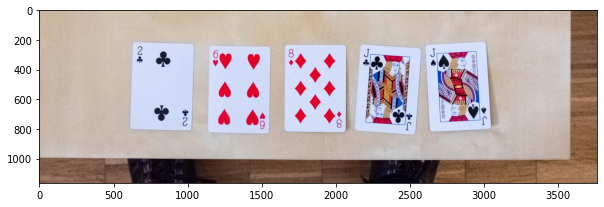

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(t_ims[0])

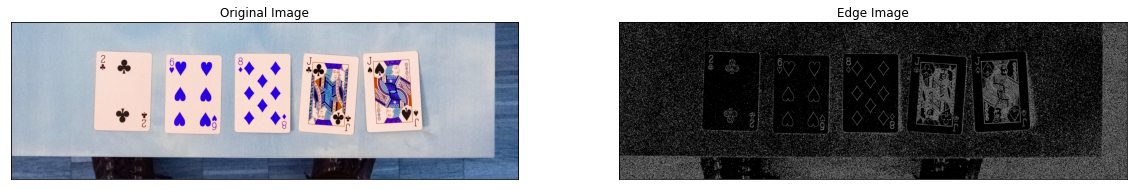

In [62]:
img = cv.cvtColor(t_ims[0], cv.COLOR_RGB2BGR)
img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)



edges = cv.Canny(img_grey,150,160) #single channels 8-bit image


plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
for i,im in enumerate(t_ims):
  print('Image Index:{}'.format(i))
  img = cv.cvtColor(im, cv.COLOR_RGB2BGR)
  img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  # Histogram Equalization
  img_equalHist = cv.equalizeHist(img_grey)
  # Morphological Transformations
  kernel = np.ones((5,5),np.uint8)
  closing = cv.morphologyEx(img_equalHist, cv.MORPH_CLOSE, kernel, iterations=1)
  # kernel = np.ones((3,3),np.uint8)
  # opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

  ret, thresh = cv.threshold(closing, 220, 255, 0)
  contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

  h, w, ch = np.array(img).shape
  obj_img = np.ones((h, w, ch), dtype=np.uint8)

  area=[]
  for k in range(len(contours)):
    area.append(cv.contourArea(contours[k]))
  max_idx = np.argmax(np.array(area))
  
  cv.drawContours(obj_img, contours, -1, (255,255,255), 3)
  plt.figure(figsize=(20,10))
  plt.subplot(121)
  plt.imshow(thresh)
  plt.subplot(122)
  plt.imshow(obj_img)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### 2 牌面识别 [Use pre_trained models](https://pytorch.org/vision/stable/models.html#)

**Useful notes**

1. All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. 
2. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. 

In [ ]:
import torchvision.models as models
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import transforms

In [ ]:
result=np.array(all_cropped)
result.shape

(28, 6)

In [ ]:
ims=np.array(ims)
ims.shape

(6,)

In [ ]:
ims[4]=np.array(ims[4])
ims[4].shape

(1164, 3765, 3)

In [ ]:
i=np.array(ims[4])
arr_new=i.reshape(3,1164,3765)
print(type(arr_new))
print(arr_new.shape)
data=np.zeros(shape=(1,3,1164,3765))
data[0]=arr_new
data.shape


<class 'numpy.ndarray'>
(3, 1164, 3765)


(1, 3, 1164, 3765)

In [ ]:
data = np.zeros(shape=(28,3,1164,3765))

for i in range(train_size):
  im = all_cropped[i]
  im_T = np.array(im[4])
  arr_new = im_T.reshape(im_T.shape[2],im_T.shape[0],im_T.shape[1])
  data[i]=arr_new
# data=torch.from_numpy(data)

In [ ]:
# raw_data = np.loadtxt('/content/drive/MyDrive/iapr/project/data/train/train_labels.csv', delimiter=',')

label_raw = np.loadtxt('/content/drive/MyDrive/iapr/project/data/train/T-LABEL-NUM.csv', delimiter='\t',dtype=np.double)
label = np.array(label_raw)
# label = torch.from_numpy(label)
label.shape

(28, 5)

In [ ]:
# prepare dataset
class Poker(Dataset):
  def __init__(self, data, label):
    self.len = data.shape[0]
    self.x_data = torch.from_numpy(data)
    self.y_data = torch.from_numpy(label)

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return self.len
batch_size = 2
train_dataset = Poker(data, label)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)  # num_workers 多线程

# design model
model = models.densenet161(pretrained=True)
model = model.double()

# consturct loss and optimizer
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.5)

# training cycle:forward, backward, update
def train(epoch):
    train_loss = 0.0
    count = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        y_pred = model(inputs)

        loss = criterion(y_pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        count = i
    print(epoch, train_loss/count)
    if epoch % 100 == 99:
        print("train loss:", train_loss / count, end=',')


In [ ]:
if __name__ == '__main__':
    for epoch in range(50):
        train(epoch)
        # if epoch % 100 == 99:
            # model_test()

### Original Code

In [ ]:
def process_image(image) -> dict:
    """
    Process image and return information. To return the value of the cards we use 
    the following format: {number}{color}. Where 
        - color is either (D)imanond, (H)eart, (S)pade, (C)lub
        - number is either 2-10, (J)ack, (Q)ueen, (K)ing. A(ce).
            
    Parameters
    ----------
    image:
        Input image to process

    Returns
    -------
    results:
        - T1 (str): String code of the first card of the flop (far left) 
        - T2 (str): String code of the second card of the flop
        - T3 (str): String code of the third card of the flop
        - T4 (str): String code of the turn
        - T5 (str): String code of the river
        - P11 (str or int): String code of player 1 card 1. Should be 0 if player 1 is not Playing.
        - P12 (str or int): String code of player 1 card 2. Should be 0 if player 1 is not Playing.
        - P21 (str or int): String code of player 2 card 1. Should be 0 if player 2 is not Playing.
        - P22 (str or int): String code of player 2 card 2. Should be 0 if player 2 is not Playing.
        - P31 (str or int): String code of player 3 card 1. Should be 0 if player 3 is not Playing.
        - P32 (str or int): String code of player 3 card 2. Should be 0 if player 3 is not Playing.
        - P41 (str or int): String code of player 4 card 1. Should be 0 if player 4 is not Playing.
        - P42 (str or int): String code of player 4 card 2. Should be 0 if player 4 is not Playing.
        - CR (int): Number of (r)ed chips in the pot
        - CG (int): Number of (g)reen chips in the pot
        - CB (int): Number of (b)lue chips in the pot
        - CK (int): Number of blac(k) chips in the pot
        - CW (int): Number of (w)hite chips in the pot
        
    Examples
    --------
    - QH: Queen of hearths
    - 10S: 10 of spades
    - AC: Ace f clubs

    """
    
    # TODO: Amazing student code
    
    
    dummy_results = {
        # Flop, river and turn
        "T1": "2C", "T2": "AH", "T3": "8D", "T4": "JC", "T5": "JS",
        # Player cards
        "P11": '2H' , "P12": '3C', "P21": 'KS', "P22": "QS", "P31": "KD", "P32":"5S" , "P41": "7H", "P42": "8H",
        # Chips
         "CR": 1, "CG": 1, "CB": 1,"CK": 5, "CW": 0
    }
    return dummy_results


Working example

In [ ]:
## load train size dataset
path_data = "/content/drive/MyDrive/iapr/project/data/train"
group_id = 32

In [ ]:
## load train size dataset
train_size = np.loadtxt(os.path.join(path_data, "train_size.txt")).astype(int)
print("Size of trainset:\n\t{}".format(train_size))

# Load images from folder
game_results = {}

# Evaluate three images
games_id = [0,3]  # to evaluate  three images

for i in games_id :
    file = os.path.join(path_data, f"train_{str(i).zfill(2)}.jpg") # Fill the string with zeros until it is 2 characters long
    # open the image
    im = PIL.Image.open(file)
    # Process the image
    results = process_image(image=im)
    # Append result to array
    game_results[i] = results

# Outputs prediction of game 0
print("Prediciton game:\n\t{}: {}".format(0, game_results[0]))

In [ ]:
# Saving results
file_results = save_results(results=game_results, groupid=group_id)

In [ ]:
# Checking the results were loaded correctly
loaded_results = load_results(file_results)
print(loaded_results.keys())

# Evaluation and Debugging

In [ ]:
# Read training data
game_labels = pd.read_csv('data/train/train_labels.csv')
game_labels = game_labels.fillna('0')
game_labels

,Image,T1,T2,T3,T4,T5,P1.1,P1.2,P2.1,P2.2,P3.1,P3.2,P4.1,P4.2,R,G,B,K,W
0,Train_00,2C,6H,8D,JC,JS,2H,4S,KS,QS,KD,5S,7H,8H,1,1,1,1,1
1,Train_01,9H,8C,2H,4C,JS,0,0,3C,KH,KD,2D,QS,3S,2,0,1,0,1
2,Train_02,9D,3D,4C,6D,2H,7H,QD,10S,10C,5C,4S,2S,4H,0,0,8,1,0
3,Train_03,6D,KH,7H,KC,6H,QC,QS,3C,3D,4H,5D,2S,7C,0,2,4,0,0
4,Train_04,KC,3C,9C,QC,10C,8H,10D,AH,JD,3S,8S,5C,10S,3,1,1,0,2
5,Train_05,8H,6D,4C,7D,AC,3D,KS,9D,6S,0,0,7H,7C,2,1,2,1,0
6,Train_06,QS,5S,KS,KD,8C,0,0,6H,7D,8D,2C,JC,JD,1,0,0,0,0
7,Train_07,7C,AD,6C,KH,9D,2D,9H,0,0,0,0,4H,5D,1,0,1,2,0
8,Train_08,9C,4C,QC,7D,JD,QD,4D,9C,10C,9D,3C,5D,KC,0,0,0,0,0
9,Train_09,8H,6D,4C,7D,AC,3D,KS,9D,6S,0,0,7H,7C,2,1,2,1,0


In [ ]:
# Evaluate
eval_listof_games( game_results , game_labels , game_id = games_id)

Game 0 results
Estimated game
['2C', 'AH', '8D', 'JC', 'JS', '2H', '3C', 'KS', 'QS', 'KD', '5S', '7H', '8H', 1, 1, 1, 5, 0]
True game
['2C' '6H' '8D' 'JC' 'JS' '2H' '4S' 'KS' 'QS' 'KD' '5S' '7H' '8H' 1 1 1 1
 1]


             	scores
Card number 	0.85 %
Card suit   	0.92 %
Chips       	0.17 %


FINAL score 	0.65 %
________________________________________
Game 3 results
Estimated game
['2C', 'AH', '8D', 'JC', 'JS', '2H', '3C', 'KS', 'QS', 'KD', '5S', '7H', '8H', 1, 1, 1, 5, 0]
True game
['6D' 'KH' '7H' 'KC' '6H' 'QC' 'QS' '3C' '3D' '4H' '5D' '2S' '7C' 0 2 4 0
 0]


             	scores
Card number 	0.08 %
Card suit   	0.15 %
Chips       	0.0 %


FINAL score 	0.08 %
________________________________________
Average SCORE =  0.36111111111111116


0.36111111111111116

In [ ]:
# Debug
debug_listof_games( game_results , game_labels, game_id = games_id)

Game 0 results
Estimated game
['2C', 'AH', '8D', 'JC', 'JS', '2H', '3C', 'KS', 'QS', 'KD', '5S', '7H', '8H', 1, 1, 1, 5, 0]
True game
['2C' '6H' '8D' 'JC' 'JS' '2H' '4S' 'KS' 'QS' 'KD' '5S' '7H' '8H' 1 1 1 1
 1]


________________________________________
Table mistakes in cards : [1]
True table
 [2♣],[6♥],[8♦],[J♣],[J♠] 
Found table
 [2♣],[A♥],[8♦],[J♣],[J♠] 


xxxxxPlayer 1 error
 True hand
 [2♥],[4♠] 
Estimated hand
 [2♥],[3♣] 


---->Player 2 found correctly [K♠],[Q♠] 


---->Player 3 found correctly [K♦],[5♠] 


---->Player 4 found correctly [7♥],[8♥] 


---->Chip Red	found: 1. Count error: ( 0 )
---->Chip Green	found: 1. Count error: ( 0 )
---->Chip Blue	found: 1. Count error: ( 0 )
xxxxxChip Black	found: 5. Count error: ( 4 )
xxxxxChip White	found: 0. Count error: ( -1 )
________________________________________
________________________________________
Game 3 results
Estimated game
['2C', 'AH', '8D', 'JC', 'JS', '2H', '3C', 'KS', 'QS', 'KD', '5S', '7H', '8H', 1, 1, 1, 5, 0]
True g